In [1]:
%matplotlib inline

import glob

import evident
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("./paper.mplstyle")

In [2]:
print(evident.__version__)

0.1.1


In [3]:
col_map = {
    "lung_disease": "Lung Disease",
    "kidney_disease": "Kidney Disease",
    "cardiovascular_disease": "Cardiovascular Disease",
    "liver_disease": "Liver Disease",
    "skin_condition": "Skin Condition",
    "ibd": "IBD",
    "ibs": "IBS",
    "asd": "ASD",
    "sex": "Sex",
    "mental_illness": "Mental Illness",
    "age_cat": "Age Category",
    "types_of_plants": "Types of Plants",
    "bowel_movement_quality": "Bowel Movement Quality",
    "country": "Country",
    "antibiotic_history": "ABX History"
}

In [4]:
md = pd.read_table("../data/agp/metadata.filt.subset.tsv", sep="\t", index_col=0)
md = md.rename(columns=col_map)
md.head()

,Lung Disease,Kidney Disease,Cardiovascular Disease,Liver Disease,Skin Condition,IBD,IBS,ASD,Sex,Mental Illness,Age Category,Types of Plants,Country,Bowel Movement Quality,ABX History
#SampleID,,,,,,,,,,,,,,,
S10317.000029332,No,No,NaN,No,Yes,NaN,No,No,female,NaN,60s,NaN,United Kingdom,Diarrhea,NaN
S10317.000074496,No,No,No,No,Yes,No,Yes,No,female,Yes,40s,11 to 20,United Kingdom,Constipation,I have not taken antibiotics in the past year.
S10317.000076179,No,No,No,No,NaN,No,No,No,female,No,20s,11 to 20,USA,Normal,Year
S10317.000066628,No,No,No,No,Yes,No,Yes,No,male,Yes,30s,More than 30,United Kingdom,Normal,I have not taken antibiotics in the past year.
S10317.000035383,No,No,No,No,No,No,Yes,No,female,NaN,40s,NaN,USA,NaN,6 months


In [5]:
for col in md.columns:
    print(md[col].value_counts(), end="\n\n")

No     12130
Yes     1374
Name: Lung Disease, dtype: int64

No     11442
Yes      160
Name: Kidney Disease, dtype: int64

No     11284
Yes      295
Name: Cardiovascular Disease, dtype: int64

No     11135
Yes      167
Name: Liver Disease, dtype: int64

No     10149
Yes     2786
Name: Skin Condition, dtype: int64

No     12518
Yes      746
Name: IBD, dtype: int64

No     9013
Yes    1567
Name: IBS, dtype: int64

No     11406
Yes       73
Name: ASD, dtype: int64

female    7266
male      6647
Name: Sex, dtype: int64

No     7678
Yes    1329
Name: Mental Illness, dtype: int64

50s     3089
60s     2991
40s     2965
30s     2959
20s     1531
70+      200
teen     178
Name: Age Category, dtype: int64

11 to 20        4310
6 to 10         2686
21 to 30        2303
More than 30    1309
Less than 5      699
Name: Types of Plants, dtype: int64

USA               8629
United Kingdom    3840
Australia          333
Canada             269
Switzerland         68
Philippines         66
Germany       

In [6]:
es_df = pd.read_table("../results/agp/beta_effect_size_by_cat.tsv", sep="\t", index_col=0)
es_df["column"] = es_df["column"].map(col_map)
es_df

,effect_size,metric,column
0,0.718385,cohens_d,IBD
1,0.177515,cohens_d,ASD
2,0.171951,cohens_d,Kidney Disease
3,0.161296,cohens_d,IBS
4,0.150334,cohens_d,Sex
5,0.074940,cohens_d,Lung Disease
6,0.066885,cohens_d,Mental Illness
7,0.063363,cohens_d,Skin Condition
8,0.045602,cohens_d,Liver Disease
9,0.016844,cohens_d,Cardiovascular Disease


In [7]:
cmap = dict(zip(es_df["column"], sns.color_palette("tab20", es_df.shape[0])))

## Overall Effect Sizes

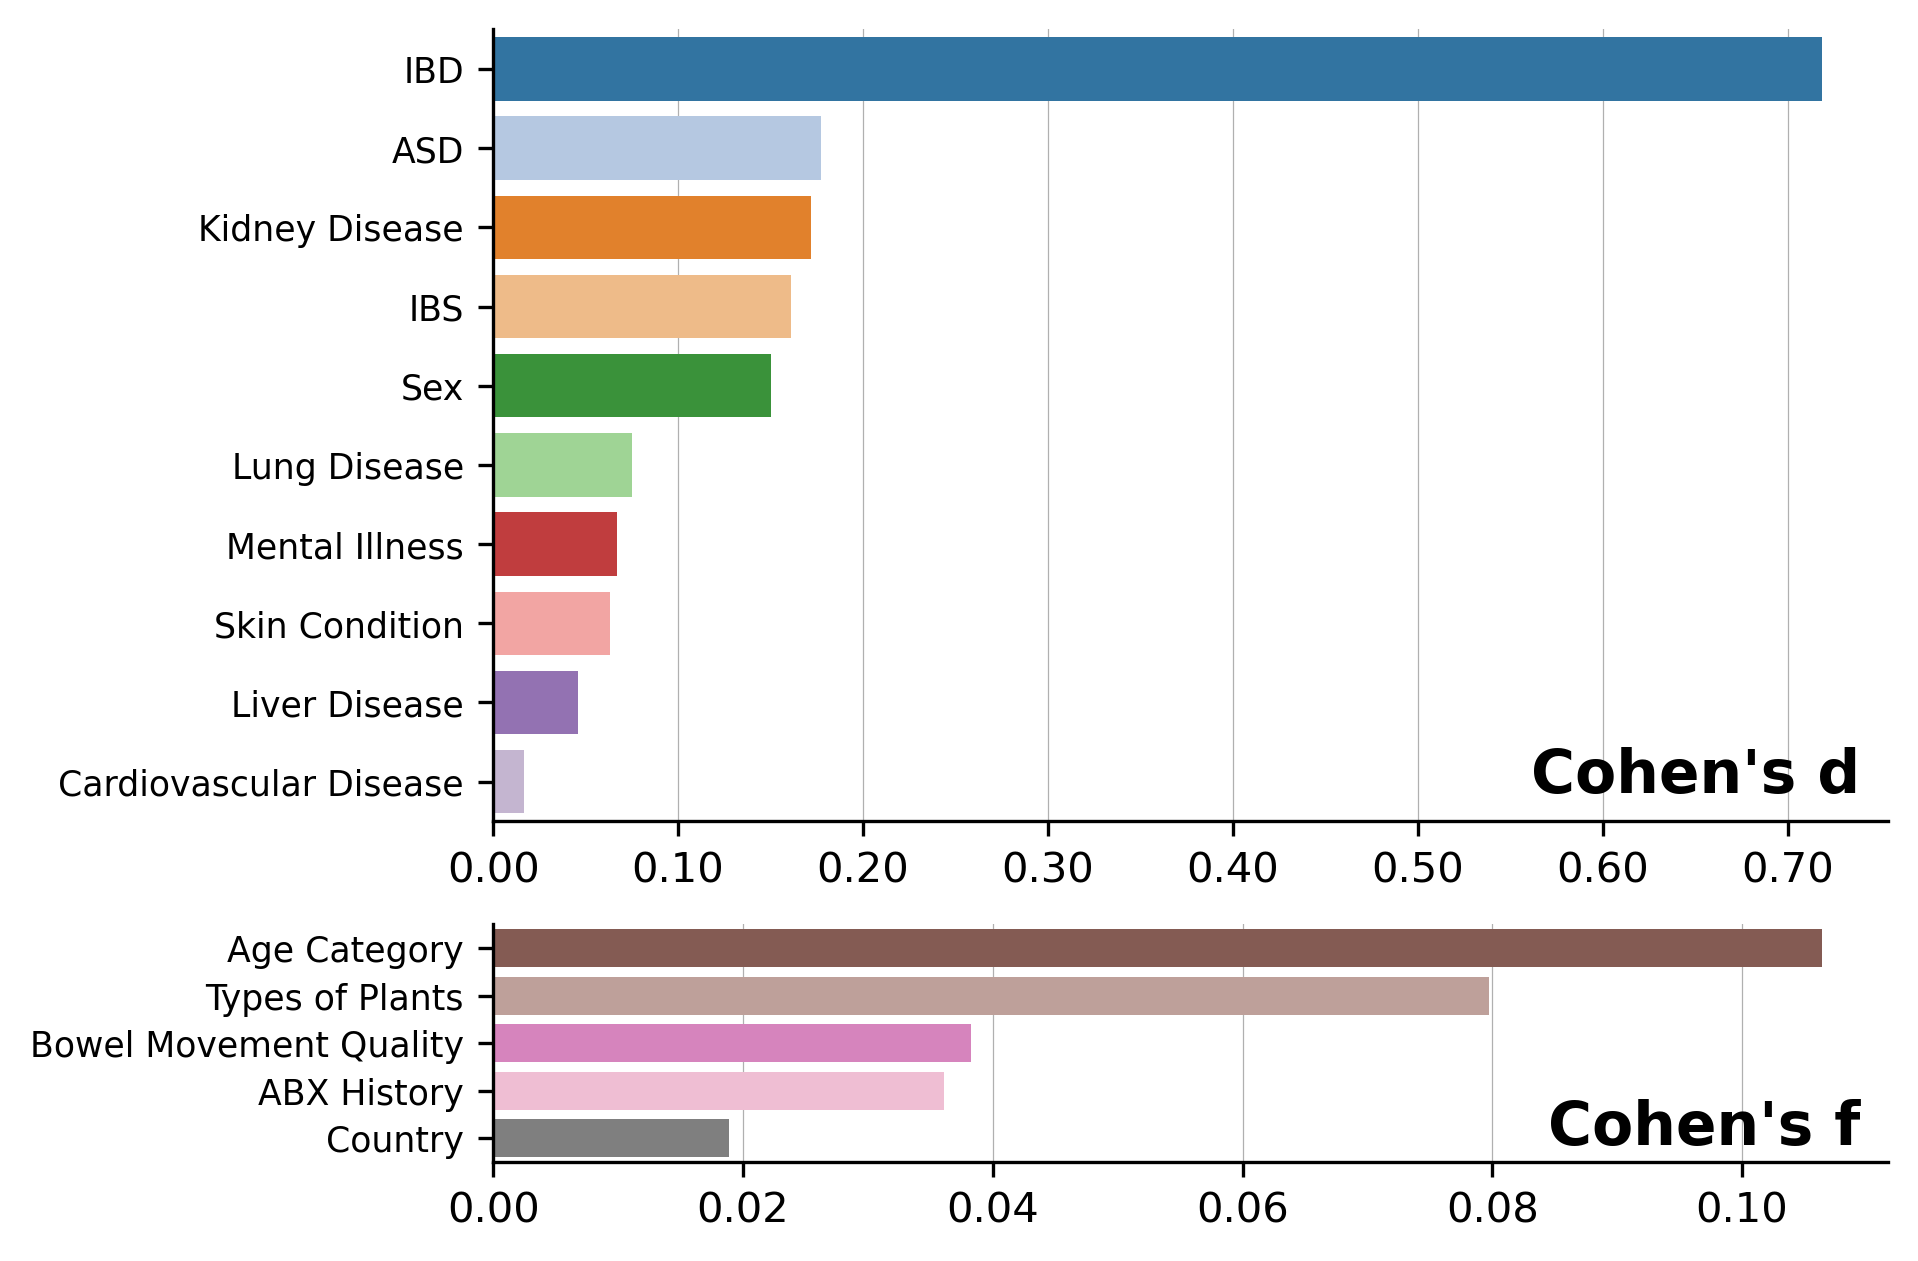

In [8]:
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FormatStrFormatter

_df_d = es_df.query("metric == 'cohens_d'")
order_d = _df_d["column"]

_df_f = es_df.query("metric == 'cohens_f'")
order_f = _df_f["column"]

num_cols = es_df.shape[0]
height_ratios = [_df_d.shape[0]/num_cols, _df_d.shape[1]/num_cols]

fig = plt.figure(figsize=(6, 5))
gs = GridSpec(ncols=1, nrows=2, height_ratios=height_ratios,
              hspace=0.2)

ax_d = fig.add_subplot(gs[0])
ax_f = fig.add_subplot(gs[1])

bar_args = {"y": "column", "x": "effect_size", "palette": cmap}
text_args = {"x": 0.98, "y": 0.02, "ha": "right", "va": "bottom", "weight": "bold",
             "fontsize": "x-large"}

sns.barplot(**bar_args, data=_df_d, ax=ax_d)
ax_d.set_xlabel("")
ax_d.text(**text_args, s="Cohen's d", transform=ax_d.transAxes)

sns.barplot(**bar_args, data=_df_f, ax=ax_f)
ax_f.text(**text_args, s="Cohen's f", transform=ax_f.transAxes)
ax_f.set_xlabel("")

for ax in [ax_d, ax_f]:
    ax.set_ylabel("")
    ax.grid(axis="x", lw=0.3)
    ax.set_axisbelow(True)
    ax.tick_params("y", labelsize="small")
    ax.xaxis.set_major_formatter(FormatStrFormatter("%.2f"))
    
plt.savefig("../figures/agp/effect_sizes.pdf")
plt.show()

In [9]:
power_dfs = []

for f in glob.glob("../results/agp/power/*.tsv"):
    _df = pd.read_table(f, sep="\t", index_col=0)
    _df = _df[["alpha", "total_observations", "power", "column", "effect_size", "metric"]]
    power_dfs.append(_df)
    
power_df = (
    pd.concat(power_dfs)
    .reset_index(drop=True)
)
power_df["column"] = power_df["column"].map(col_map)
power_df

,alpha,total_observations,power,column,effect_size,metric
0,0.01,20,0.010324,Liver Disease,0.045602,cohens_d
1,0.05,20,0.051071,Liver Disease,0.045602,cohens_d
2,0.10,20,0.101635,Liver Disease,0.045602,cohens_d
3,0.01,40,0.010714,Liver Disease,0.045602,cohens_d
4,0.05,40,0.052268,Liver Disease,0.045602,cohens_d
...,...,...,...,...,...,...
1120,0.05,480,0.106361,Bowel Movement Quality,0.038272,cohens_f
1121,0.10,480,0.182045,Bowel Movement Quality,0.038272,cohens_f
1122,0.01,500,0.030611,Bowel Movement Quality,0.038272,cohens_f
1123,0.05,500,0.108875,Bowel Movement Quality,0.038272,cohens_f


## Overall Power Curves

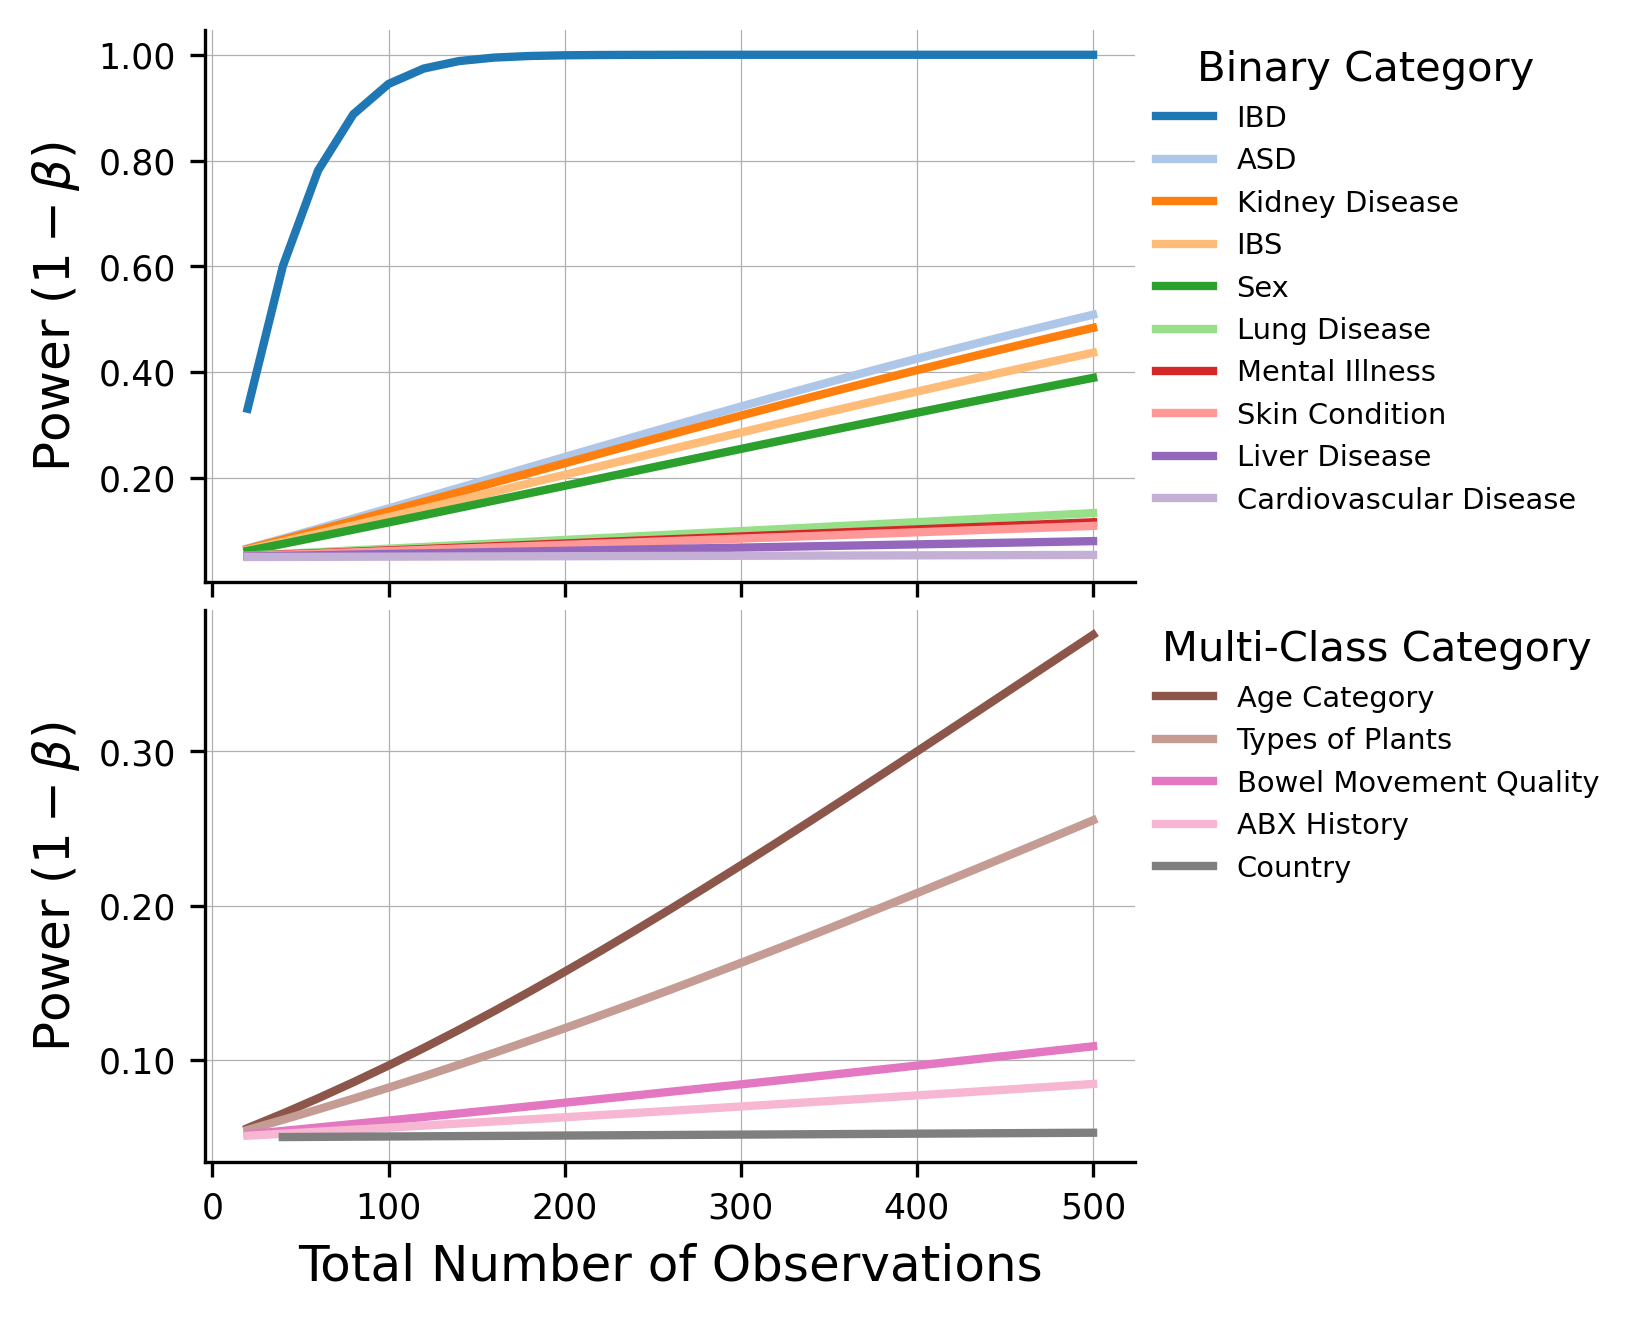

In [10]:
_df_d = power_df.query("metric == 'cohens_d' & alpha == 0.05")
_df_f = power_df.query("metric == 'cohens_f' & alpha == 0.05")

fig = plt.figure(figsize=(4, 5))
gs = GridSpec(ncols=1, nrows=2, hspace=0.05)

ax_d = fig.add_subplot(gs[0])
ax_f = fig.add_subplot(gs[1])

line_args = {"y": "power", "x": "total_observations", "palette": cmap, "hue": "column",
             "lw": 2}
text_args = {"x": 0.98, "y": 0.02, "ha": "right", "va": "bottom", "weight": "bold",
             "fontsize": "x-large"}

sns.lineplot(**line_args, data=_df_d, ax=ax_d, hue_order=order_d)
ax_d.set_xlabel("")
ax_d.set_xticklabels([])

sns.lineplot(**line_args, data=_df_f, ax=ax_f, hue_order=order_f)
ax_f.set_xlabel("Total Number of Observations", fontsize="large")

for ax in [ax_d, ax_f]:
    ax.set_ylabel(r"Power $(1 - \beta)$", fontsize="large")
    ax.grid(axis="both", lw=0.3)
    ax.set_axisbelow(True)
    ax.tick_params("both", labelsize="small")
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))

# https://stackoverflow.com/a/48296983
leg_args = {"bbox_to_anchor": [1, 1], "loc": "upper left", "fontsize": "x-small",
            "frameon": False, "borderpad": 0.2}

leg_d = ax_d.legend(title="Binary Category", **leg_args)
for line in leg_d.get_lines():
    line.set_linewidth(2)
    
leg_f = ax_f.legend(title="Multi-Class Category", **leg_args)
for line in leg_f.get_lines():
    line.set_linewidth(2)

plt.savefig("../figures/agp/power_curves.pdf")
plt.show()

## Pairwise Effect Sizes

In [11]:
pw_es_df = pd.read_table("../results/agp/beta_pairwise_effect_size_by_cat.tsv", sep="\t", index_col=0)
pw_es_df["column"] = pw_es_df["column"].map(col_map)
pw_es_df

,effect_size,metric,column,group_1,group_2
0,2.657358,cohens_d,Country,Jersey,Thailand
1,2.111251,cohens_d,Country,India,Jersey
2,1.801805,cohens_d,Country,Czech Republic,Jersey
3,1.625358,cohens_d,Country,Denmark,Jersey
4,1.542273,cohens_d,Country,Australia,Jersey
...,...,...,...,...,...
374,0.006062,cohens_d,Country,Greece,Italy
375,0.005285,cohens_d,Types of Plants,6 to 10,Less than 5
376,0.002626,cohens_d,Country,Sweden,United Kingdom
377,0.001349,cohens_d,ABX History,Month,Year


In [12]:
pw_es_df["column"].value_counts()

Country                   325
Age Category               21
Types of Plants            10
ABX History                10
Bowel Movement Quality      3
IBD                         1
ASD                         1
Kidney Disease              1
IBS                         1
Sex                         1
Lung Disease                1
Mental Illness              1
Skin Condition              1
Liver Disease               1
Cardiovascular Disease      1
Name: column, dtype: int64

Gonna skip country since there's a lot of pairwise comparisons.

In [13]:
pw_cats = ["Age Category", "Bowel Movement Quality", "Types of Plants", "ABX History"]

In [14]:
pw_es_df = pw_es_df[pw_es_df["column"].isin(pw_cats)].reset_index(drop=True)
pw_es_df

,effect_size,metric,column,group_1,group_2
0,0.673237,cohens_d,Age Category,40s,70+
1,0.635531,cohens_d,Age Category,30s,70+
2,0.602933,cohens_d,Age Category,20s,70+
3,0.524702,cohens_d,Age Category,70+,teen
4,0.518636,cohens_d,Age Category,50s,70+
5,0.329414,cohens_d,Age Category,60s,teen
6,0.307891,cohens_d,Age Category,60s,70+
7,0.272166,cohens_d,Age Category,40s,60s
8,0.240117,cohens_d,Age Category,30s,60s
9,0.227568,cohens_d,Age Category,20s,60s


/home/grahman/miniconda3/envs/evident-analyses/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


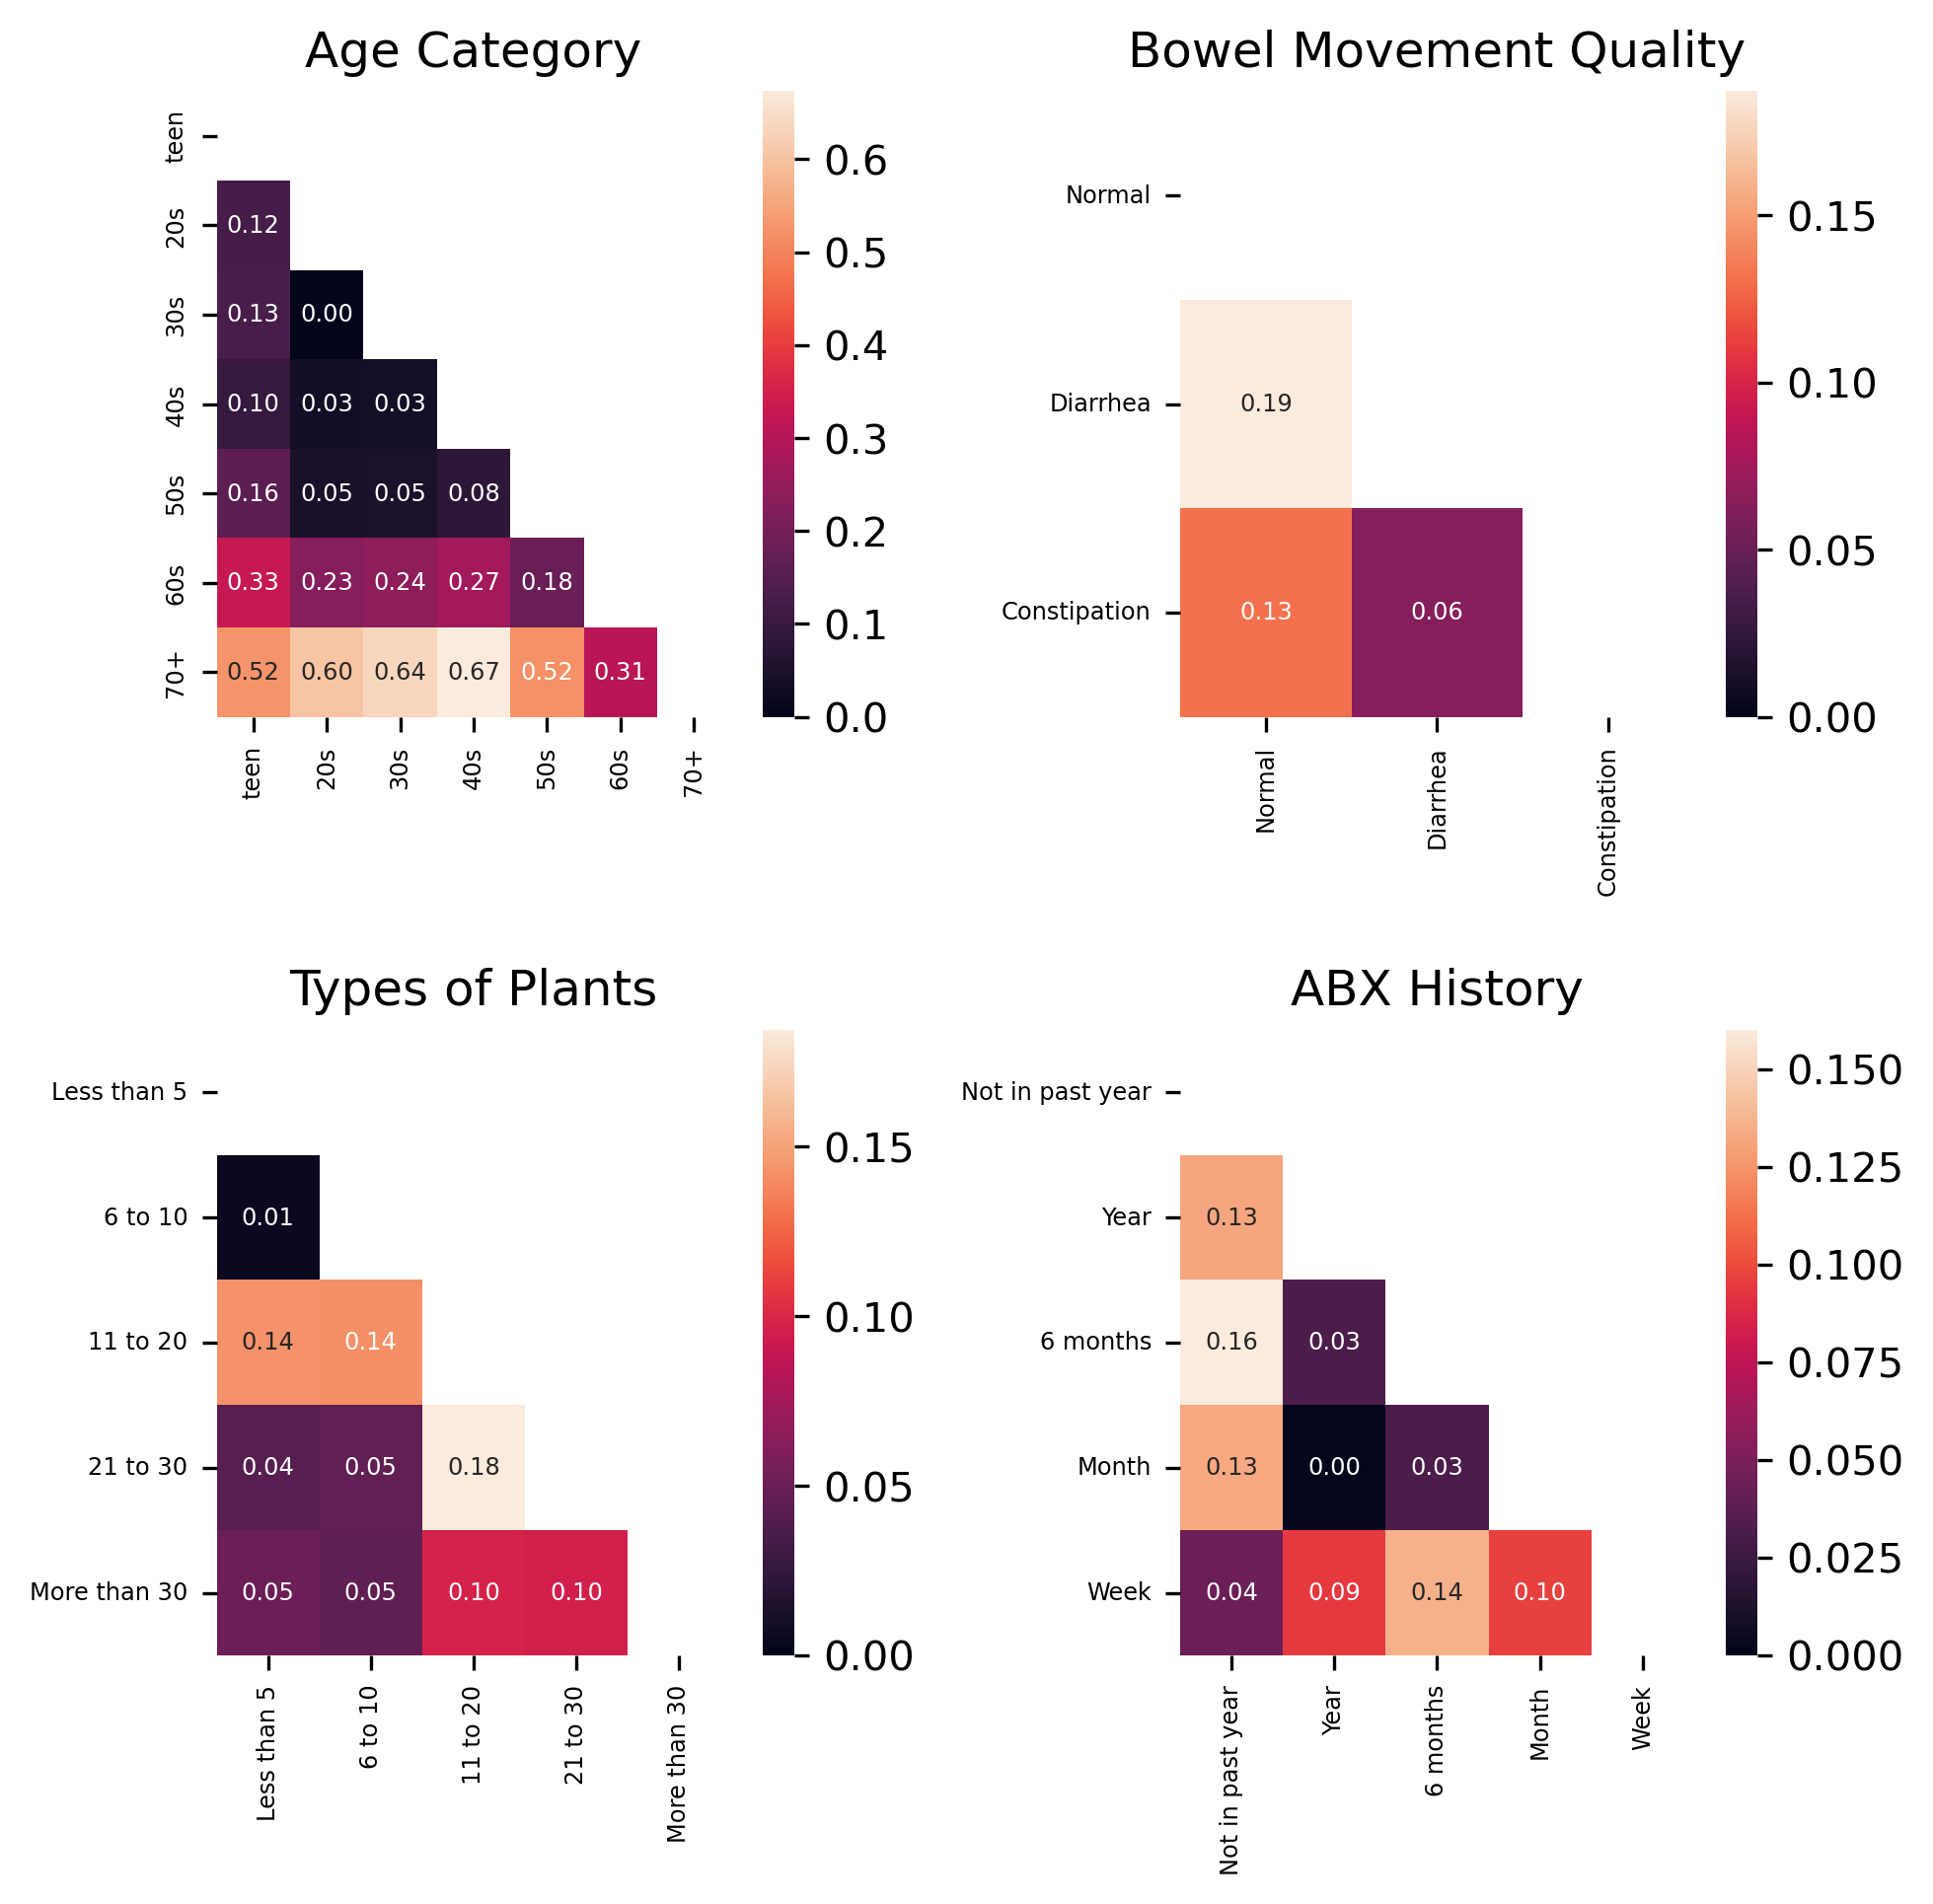

In [15]:
from itertools import combinations

def sorted_groups(row):
    grp1 = row["group_1"]
    grp2 = row["group_2"]
    return tuple(sorted([grp1, grp2]))

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

age_order = ["teen", "20s", "30s", "40s", "50s", "60s", "70+"]
plant_order = ["Less than 5", "6 to 10", "11 to 20", "21 to 30", "More than 30"]
abx_order = ["Not in past year", "Year", "6 months", "Month", "Week"]
bowel_order = ["Normal", "Diarrhea", "Constipation"]

for i, (col, ax) in enumerate(zip(pw_cats, axs.flatten())):
    uniq_groups = sorted(md[col].dropna().unique())        
    n = len(uniq_groups)
    idx_dict = {grp: i for i, grp in enumerate(uniq_groups)}
    col_mat = np.zeros([n, n])
    
    _df = pw_es_df.query("column == @col")
    sorted_combo_vals = _df.apply(sorted_groups, axis=1).values
    _df["sorted_combo"] = sorted_combo_vals
    
    for grp1, grp2 in combinations(uniq_groups, 2):
        this_sorted_combo = tuple(sorted([grp1, grp2]))
        row = _df[_df["sorted_combo"] == this_sorted_combo]
        i = idx_dict[grp1]
        j = idx_dict[grp2]
        col_mat[j, i] = row["effect_size"]
        col_mat[i, j] = row["effect_size"]
    
    col_mat = pd.DataFrame(col_mat, index=idx_dict.keys(), columns=idx_dict.keys())
    if col == "Age Category":
        col_mat = col_mat.loc[age_order, age_order]
    if col == "ABX History":
        new_vals = [
            "Not in past year"
            if x == "I have not taken antibiotics in the past year."
            else x
            for x in col_mat.columns
        ]
        col_mat.columns = new_vals
        col_mat.index = new_vals
        col_mat = col_mat.loc[abx_order, abx_order]
    if col == "Types of Plants":
        col_mat = col_mat.loc[plant_order, plant_order]
    if col == "Bowel Movement Quality":
        col_mat = col_mat.loc[bowel_order, bowel_order]
    
    mask = np.zeros_like(col_mat.values)
    mask[np.triu_indices_from(mask)] = True
    g = sns.heatmap(
        col_mat,
        ax=ax,
        annot=True,
        mask=mask,
        fmt=".2f",
        vmin=0,
        annot_kws={"fontsize": "xx-small"},
    )
    ax.set_title(col)
    ax.tick_params("both", labelsize="xx-small")

plt.savefig("../figures/agp/pw_effect_sizes.pdf")
plt.show()

## Pairwise Power Analysis

In [16]:
from zipfile import ZipFile
import tarfile

In [17]:
pw_power_dir = "../results/agp/power/pairwise"
glob.glob(f"{pw_power_dir}/*")

['../results/agp/power/pairwise/types_of_plants',
 '../results/agp/power/pairwise/bowel_movement_quality',
 '../results/agp/power/pairwise/age_cat.tar.gz',
 '../results/agp/power/pairwise/age_cat',
 '../results/agp/power/pairwise/antibiotic_history',
 '../results/agp/power/pairwise/antibiotic_history.tar.gz',
 '../results/agp/power/pairwise/bowel_movement_quality.tar.gz',
 '../results/agp/power/pairwise/types_of_plants.tar.gz',
 '../results/agp/power/pairwise/country',
 '../results/agp/power/pairwise/country.tar.gz']

In [18]:
import re

comp_regex = re.compile("/([^/]+)_vs_(.+)_power.tsv")

/home/grahman/miniconda3/envs/evident-analyses/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
/home/grahman/miniconda3/envs/evident-analyses/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
/home/grahman/miniconda3/envs/evident-analyses/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
/home/grahman/miniconda3/envs/evident-analyses/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: The default value of regex will change from True to False in a future version.


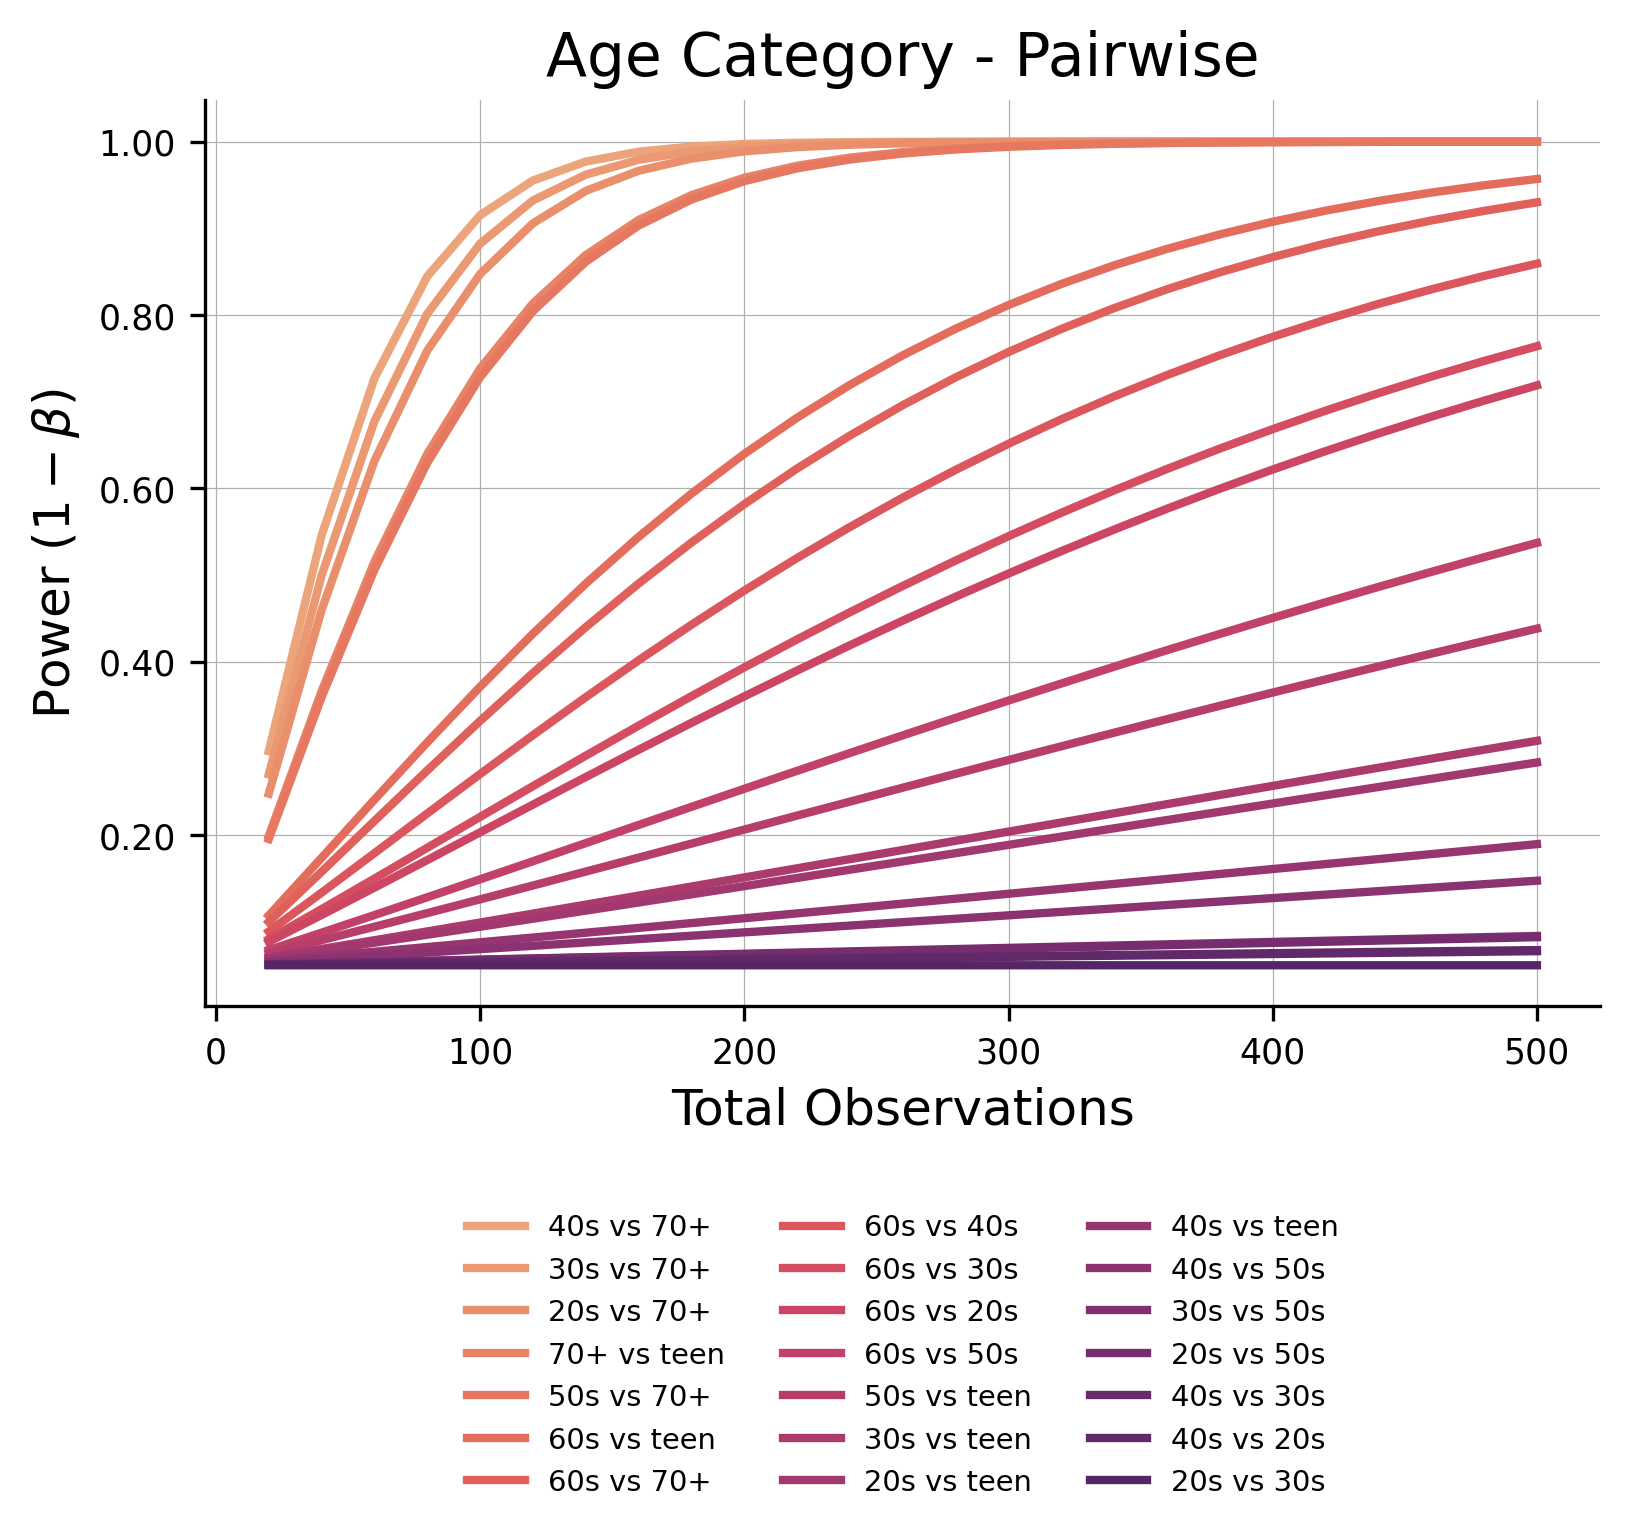

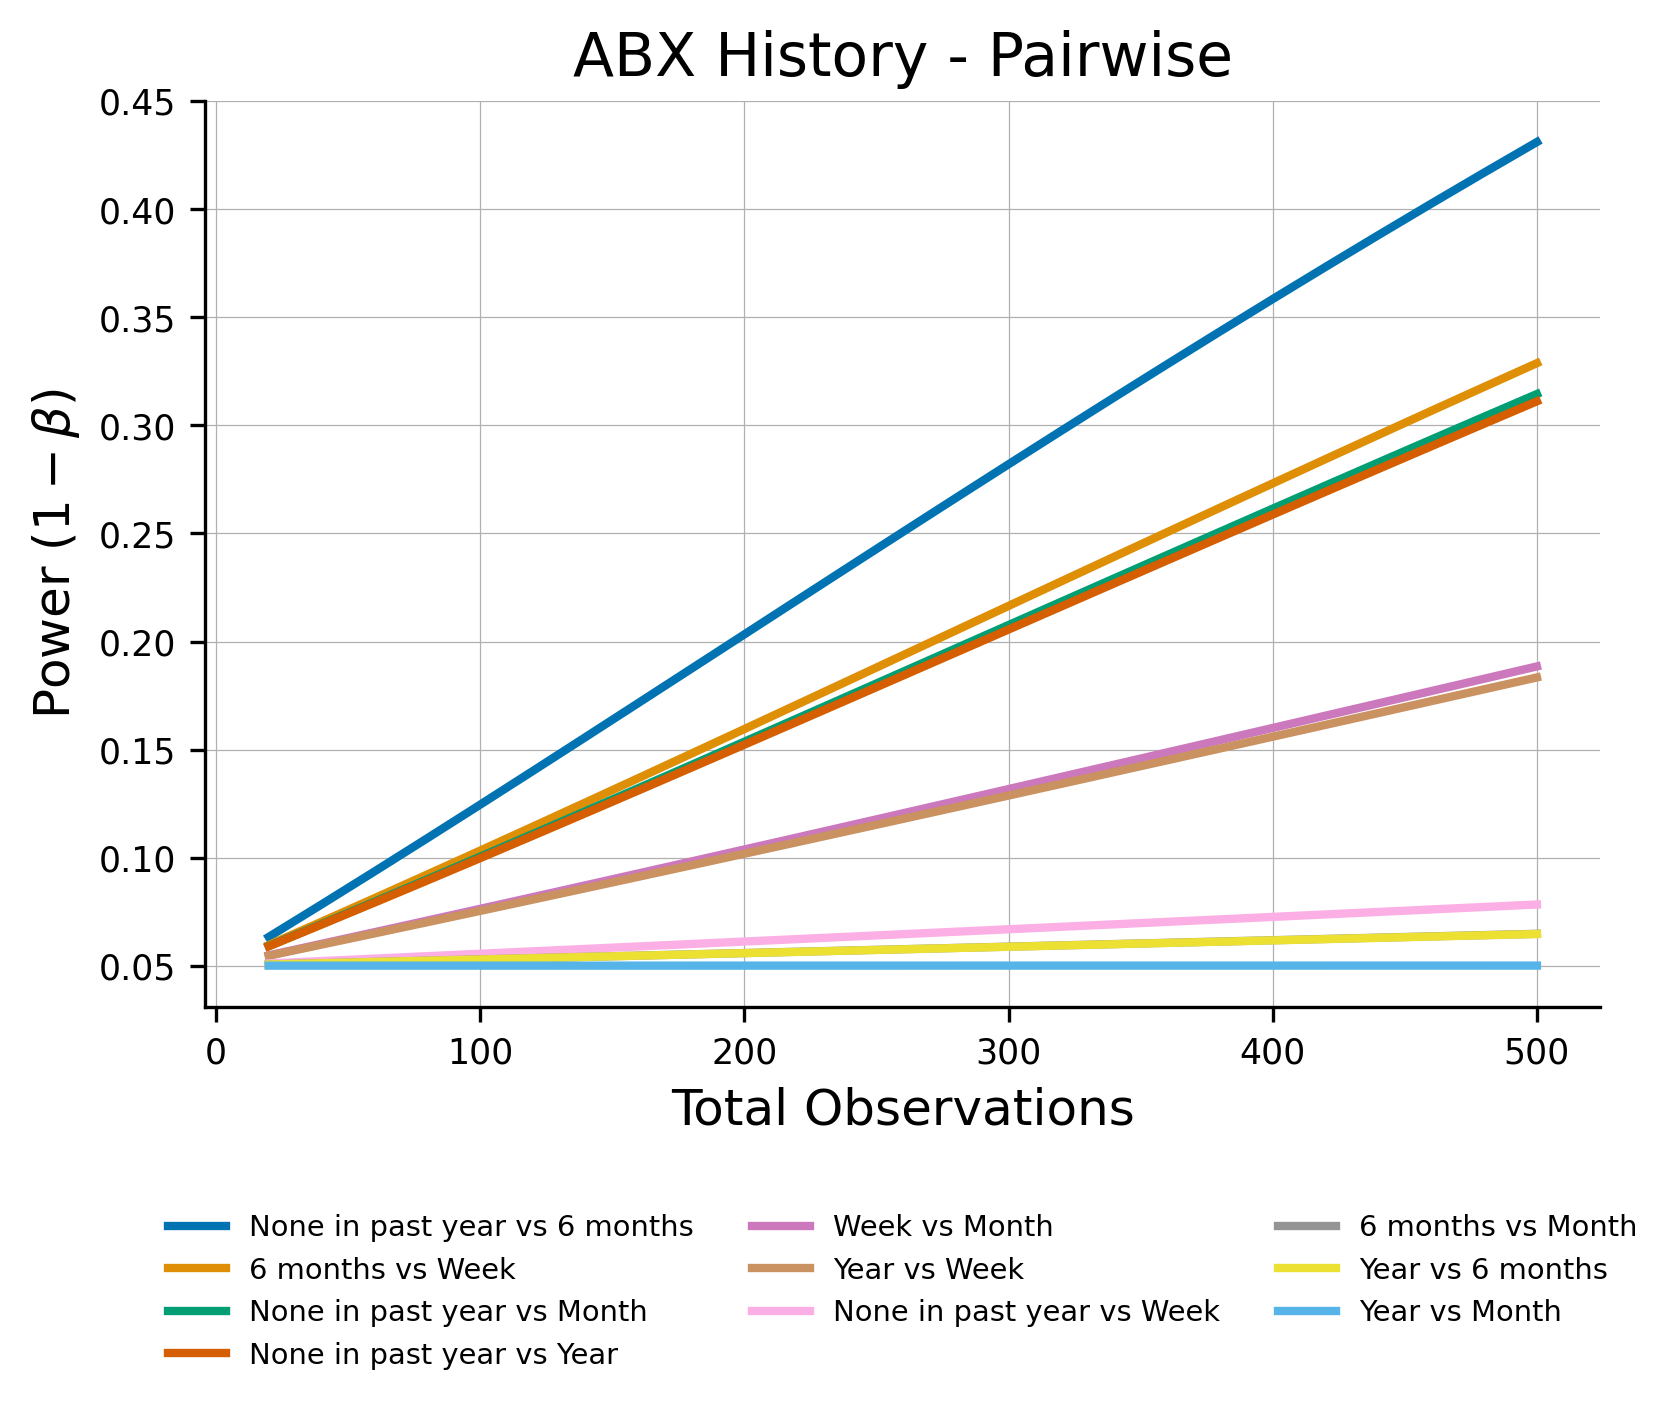

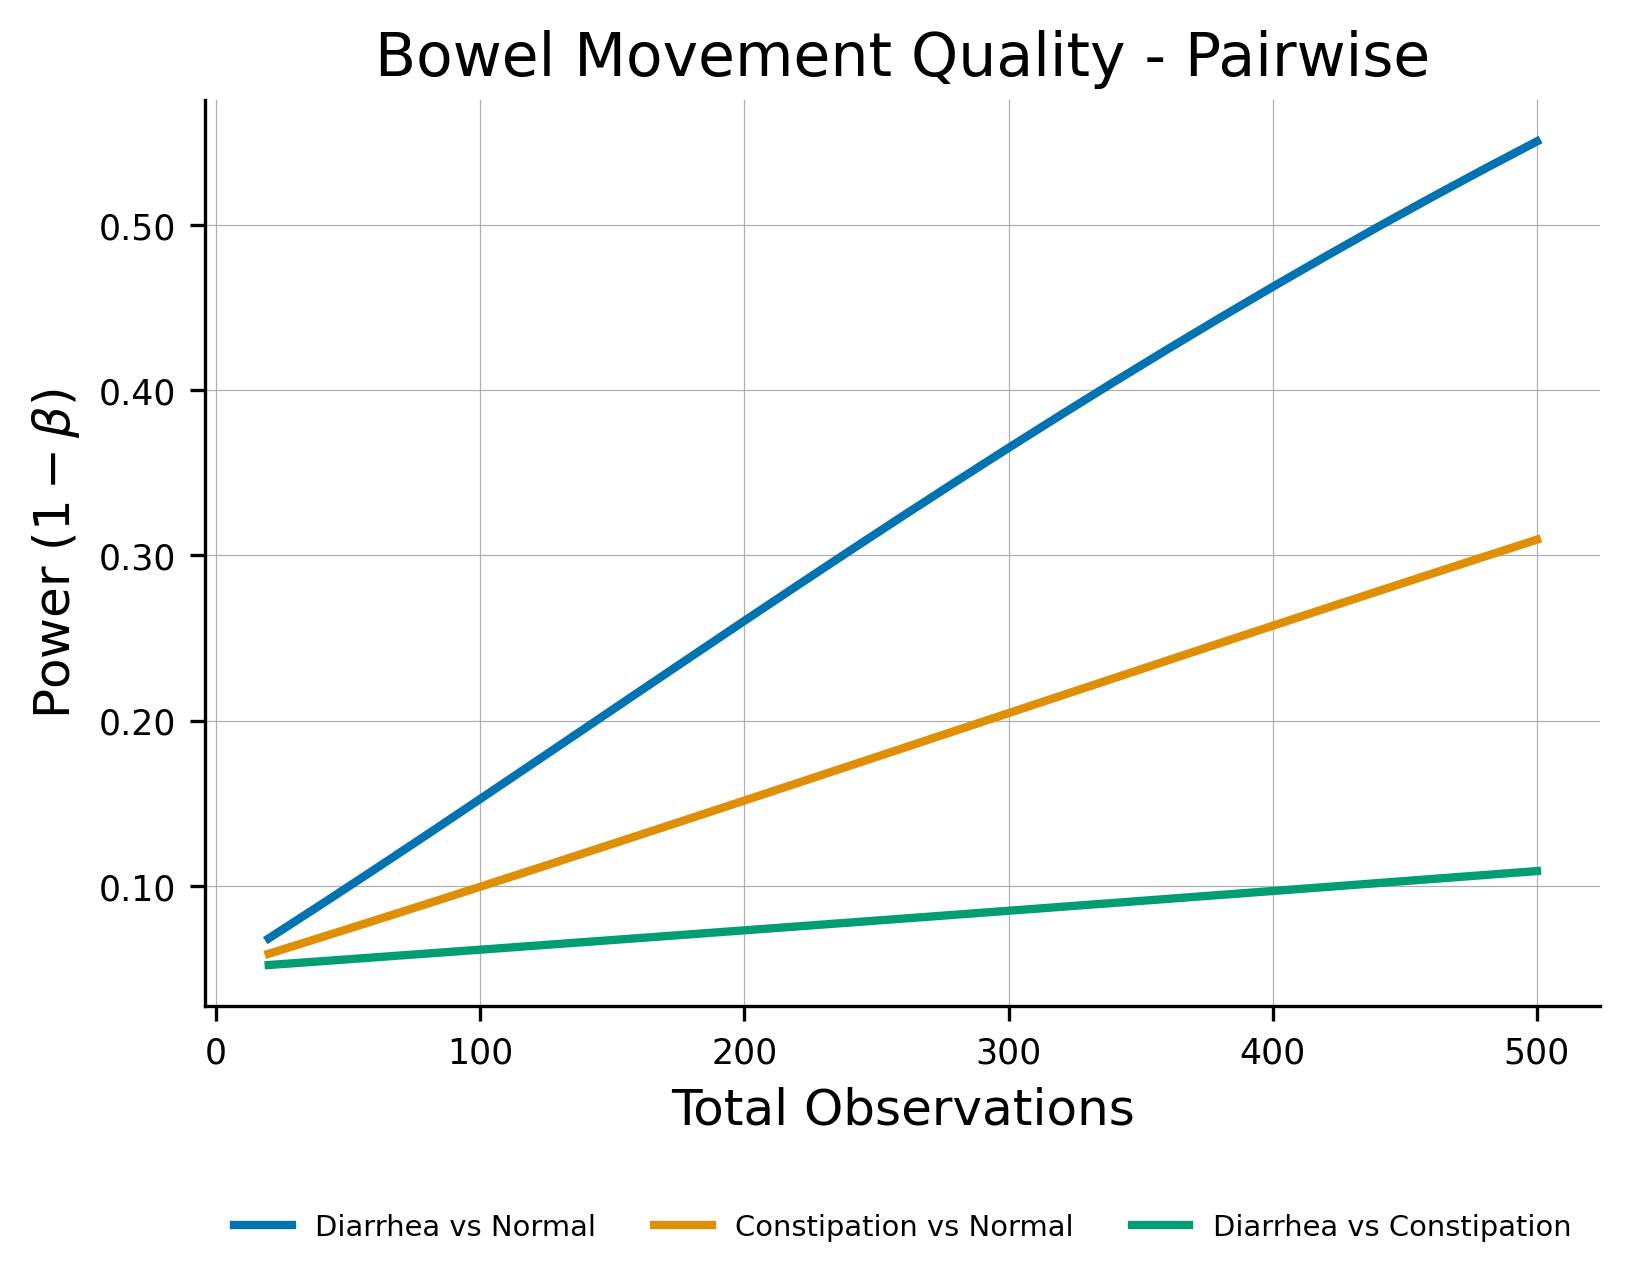

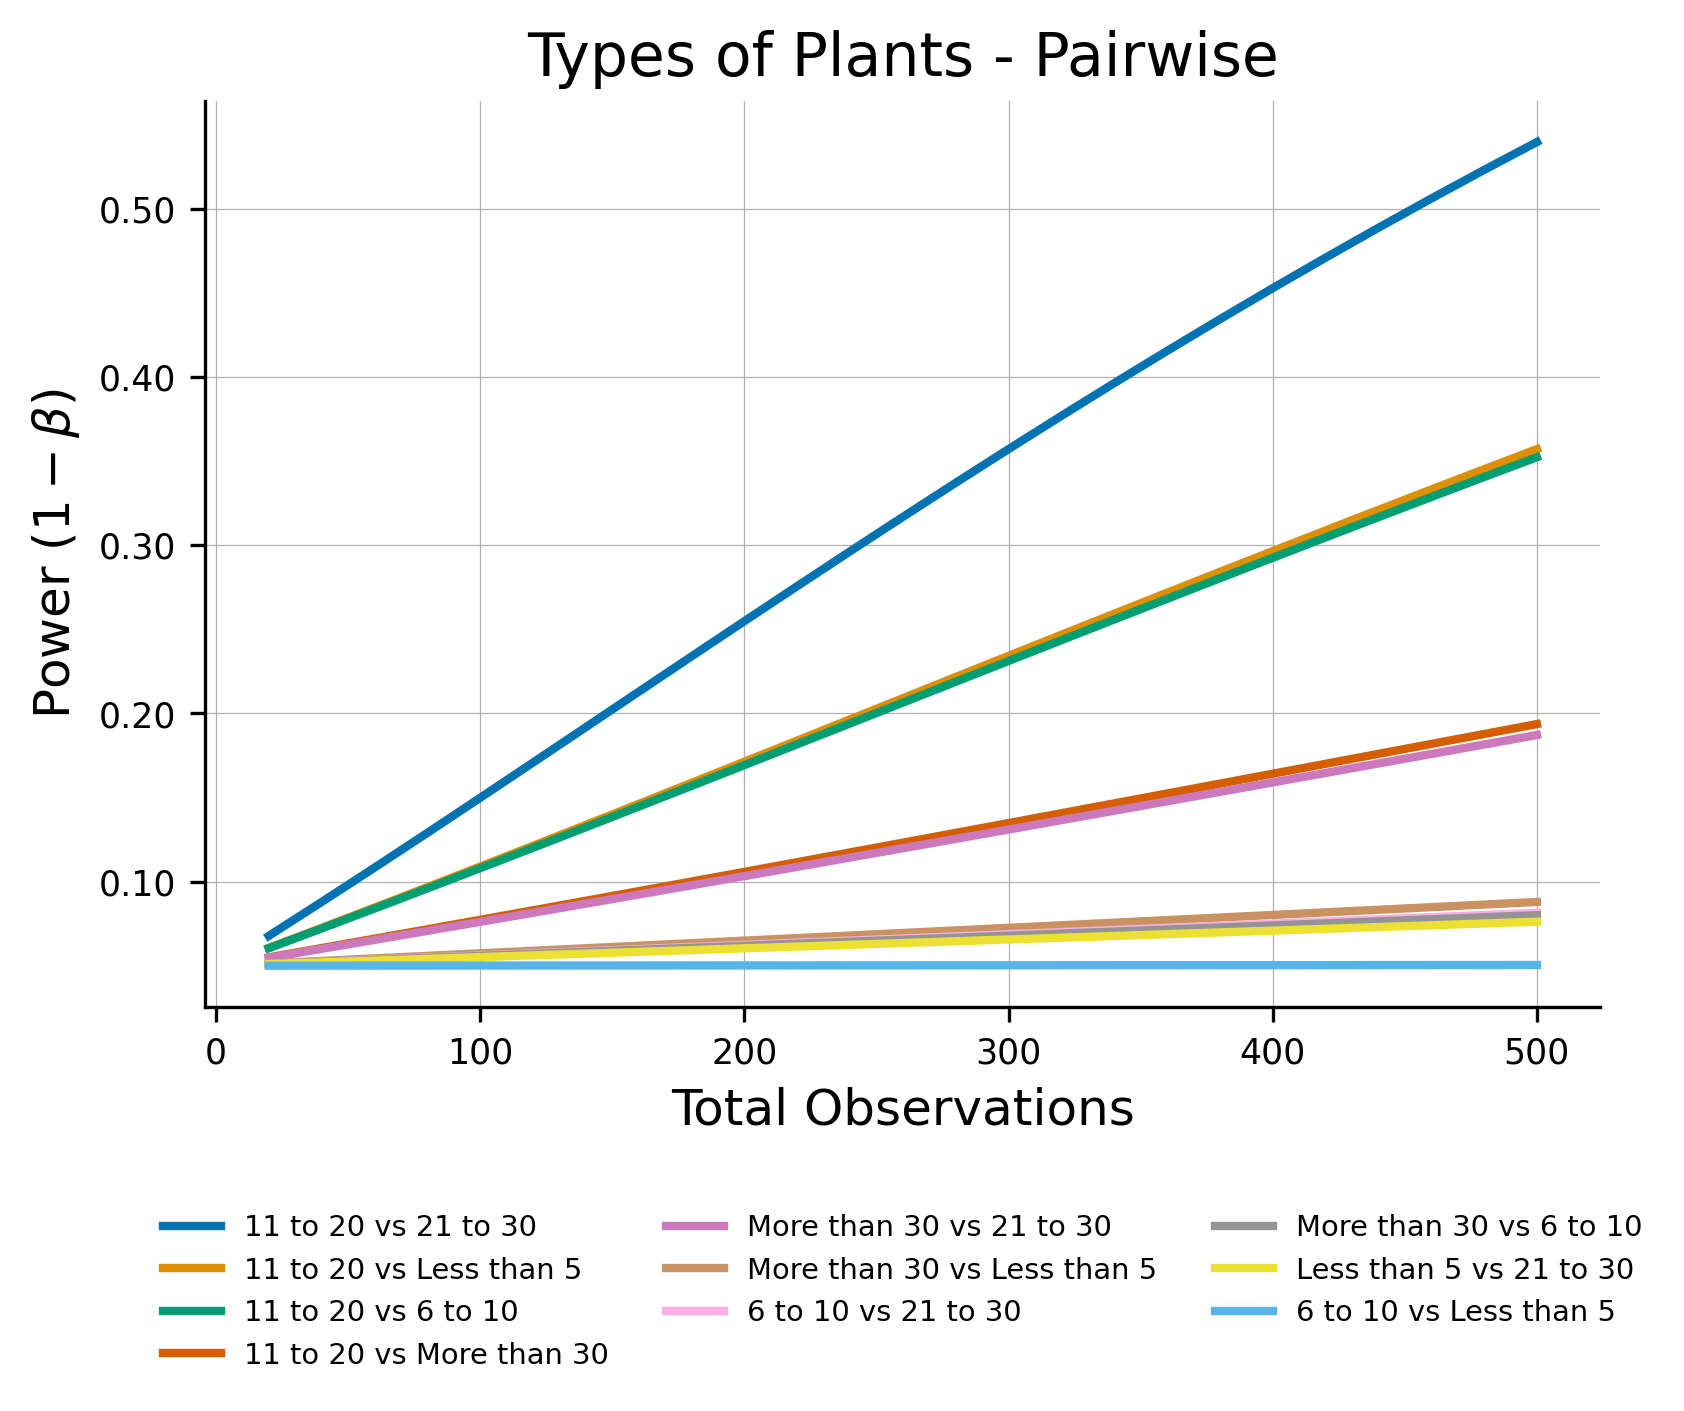

In [19]:
cols = ["age_cat", "antibiotic_history", "bowel_movement_quality", "types_of_plants"]

for i, col in enumerate(cols):
    fig, ax = plt.subplots(1, 1)
    
    pw_power_dfs = []
    
    # https://stackoverflow.com/a/37474813
    pw_col_power_targz = tarfile.open(f"{pw_power_dir}/{col}.tar.gz")
    for member in pw_col_power_targz.getmembers():
        f = pw_col_power_targz.extractfile(member)
        if f:
            _df = pd.read_table(f, sep="\t", index_col=0)
            pw_power_dfs.append(_df)
    
    pw_power_df = (
        pd.concat(pw_power_dfs)
        .query("alpha == 0.05")
        .reset_index(drop=True)
        .sort_values(by="effect_size", ascending=False)
    )
    pw_power_df["column"] = pw_power_df["column"].str.replace(f"{col}_", "")
    pw_power_df["column"] = pw_power_df["column"].str.replace("_", " ")
    pw_power_df["column"] = pw_power_df["column"].str.replace(
        "I have not taken antibiotics in the past year.", "None in past year"
    )
    
    hue_order = pw_power_df.groupby("column")["effect_size"].mean().sort_values(ascending=False).index
    
    sns.lineplot(
        x="total_observations",
        y="power",
        hue="column",
        data=pw_power_df,
        hue_order=hue_order,
        palette="flare" if col == "age_cat" else "colorblind",
        lw=2,
        ax=ax
    )
    g = ax.legend(
        bbox_to_anchor=[0.5, -0.2],
        loc="upper center",
        ncol=3,
        frameon=False,
        fontsize="x-small"
    )
    for line in g.get_lines():
        line.set_linewidth(2)
    
    ax.set_ylabel(r"Power $(1 - \beta)$", fontsize="large")
    ax.set_xlabel("Total Observations", fontsize="large")
    ax.grid(axis="both", lw=0.3)
    ax.set_axisbelow(True)
    ax.tick_params("both", labelsize="small")
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
    ax.set_title(f"{col_map[col]} - Pairwise", fontsize="x-large")
    plt.savefig(f"../figures/agp/pw_power_curve_{col}.pdf")
    
plt.show()